In [2]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

In [3]:
#Add your file path here
stock_path = os.path.join("Resources","FB_daily_stock_yahoo.csv")
employee_reviews_path = os.path.join("Resources","employee_reviews.csv")
vix_data_to_load = "Resources/vix-daily.csv"
fb_data_to_load = "Resources/FB_daily_stock_yahoo.csv"
int_rate_path = os.path.join("Resources","FEDFUNDS.csv")

In [4]:
# Facebook Stock Data
stock = pd.read_csv(stock_path)
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900
1,2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900
2,2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200
3,2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300
4,2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22880400


In [5]:
#Get the average stock price per month
stock["YYYY-MM"] = [x[:7] for x in stock["Date"]]
stock_grouped = stock.groupby("YYYY-MM")
stock_monthly = pd.DataFrame(stock_grouped["Close"].mean())
stock_monthly["Year Month"] = pd.to_datetime(stock_monthly.index)
stock_monthly.head()

,Close,Year Month
YYYY-MM,,
2017-01,126.817499,2017-01-01
2017-02,133.830525,2017-02-01
2017-03,139.408261,2017-03-01
2017-04,142.965263,2017-04-01
2017-05,150.234093,2017-05-01


In [6]:
# Employee Reviews
reviews_df = pd.read_csv(employee_reviews_path)
fb_reviews_df = reviews_df[reviews_df["company"] == "facebook"]
fb_reviews_df.head()

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
34249,34250,facebook,"Menlo Park, CA","Dec 11, 2018",Current Employee - Product Operations,2nd Job out of college --> Great Experience,Context: I worked in operations - Very entrepr...,- Very entrepreneurial culture: There is no fo...,none,5.0,4.0,4.0,5.0,5.0,4.0,0,https://www.glassdoor.com/Reviews/Facebook-Rev...
34250,34251,facebook,"Menlo Park, CA","Feb 16, 2017",Current Employee - Anonymous Employee,"Fast paced company with high expectations, but...",- Incredible benefits - Excellent compensation...,- If you don't learn to make the work life bal...,"Keep doing what you're doing, keep an eye on e...",5.0,5.0,5.0,5.0,5.0,5.0,294,https://www.glassdoor.com/Reviews/Facebook-Rev...
34251,34252,facebook,"Menlo Park, CA","Feb 16, 2016",Current Employee - Site Selection Program Manager,Pleasantly Surprised,I'm a 55 year old working in a company where t...,"Like any tech company, the work is big and com...",Keep doing what you're doing and fight hard to...,5.0,4.0,5.0,4.0,5.0,5.0,363,https://www.glassdoor.com/Reviews/Facebook-Rev...
34252,34253,facebook,"Menlo Park, CA","Dec 3, 2018",Current Employee - Anonymous Employee,Don't believe all of the negative press,Having worked at Facebook for a number of year...,"Particularly as of late, Facebook has been sub...",none,5.0,4.0,5.0,5.0,5.0,5.0,6,https://www.glassdoor.com/Reviews/Facebook-Rev...
34253,34254,facebook,"Seattle, WA","Dec 5, 2018",Current Employee - Staff Software Engineer,Continues to be an amazing place to be,Smart people who were chosen to be good to wor...,Took a year and a half to learn to play defens...,I'd love to see management be half as open wit...,5.0,5.0,5.0,5.0,4.0,5.0,4,https://www.glassdoor.com/Reviews/Facebook-Rev...


In [7]:
fb_reviews_short = fb_reviews_df[[True if x[-4:] == "2018" or x[-4:] == "2017" else False for x in fb_reviews_df["dates"]]]
fb_reviews_short.loc[:,"Month Year"] = [x[:5] + x[-4:] for x in np.array(fb_reviews_short["dates"])]

C:\Users\james.jean-jacques\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james.jean-jacques\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
grouped_reviews = fb_reviews_short.groupby("Month Year")
monthly_rating = pd.DataFrame(grouped_reviews["overall-ratings"].mean())
monthly_rating.index.names = ["Date"]
monthly_rating["Month Year"] = pd.to_datetime(monthly_rating.index)
monthly_rating_sorted = monthly_rating.sort_values(by="Month Year")
monthly_rating_sorted = monthly_rating_sorted.rename(columns = {"Month Year":"Year Month"})
monthly_rating_sorted.head()

,overall-ratings,Year Month
Date,,
Jan 2017,4.545455,2017-01-01
Feb 2017,4.677419,2017-02-01
Mar 2017,4.692308,2017-03-01
Apr 2017,4.750000,2017-04-01
May 2017,4.700000,2017-05-01


In [9]:
# Join the two data sets
joined_stock = pd.merge(monthly_rating_sorted,stock_monthly, on = "Year Month")
joined_stock.head()

,overall-ratings,Year Month,Close
0,4.545455,2017-01-01,126.817499
1,4.677419,2017-02-01,133.830525
2,4.692308,2017-03-01,139.408261
3,4.750000,2017-04-01,142.965263
4,4.700000,2017-05-01,150.234093


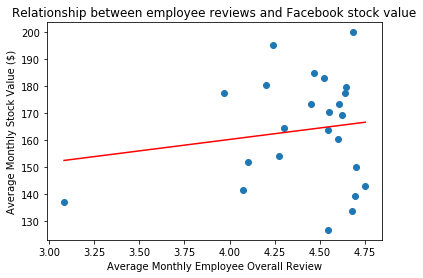

In [10]:
# Plot the data
x = joined_stock["overall-ratings"]
y = joined_stock["Close"]
plt.scatter(x,y)
plt.title("Relationship between employee reviews and Facebook stock value")
plt.xlabel("Average Monthly Employee Overall Review")
plt.ylabel("Average Monthly Stock Value ($)")
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = "red")

In [11]:
stock = pd.read_csv(stock_path)
stock_price=stock[['Date','Close']]
stock_price.head()

,Date,Close
0,2017-01-03,116.860001
1,2017-01-04,118.690002
2,2017-01-05,120.669998
3,2017-01-06,123.410004
4,2017-01-09,124.900002


In [17]:
#Get the average stock price per month
stock["YYYY-MM"] = [x[:7] for x in stock["Date"]]
stock_grouped = stock.groupby("YYYY-MM")
stock_monthly = pd.DataFrame(stock_grouped["Close"].mean())
stock_monthly["Year Month"] = pd.to_datetime(stock_monthly.index)
stock_monthly.head()

,Close,Year Month
YYYY-MM,,
2017-01,126.817499,2017-01-01
2017-02,133.830525,2017-02-01
2017-03,139.408261,2017-03-01
2017-04,142.965263,2017-04-01
2017-05,150.234093,2017-05-01


In [18]:
employment="employmentrates.csv"
employment_rate = pd.read_csv(employment)

In [19]:
employment_rate=employment_rate.loc[employment_rate['SUBJECT']=='LREM64TT']
employment_rate["Time"] = pd.to_datetime(employment_rate["Time"])
employment=employment_rate.rename(columns={"Time":"Year Month","Value":"Employment Rate" })
employment.head()

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Year Month,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Employment Rate,Flag Codes,Flags
74,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2016-01,2016-01-01,PC,Percentage,0,Units,NaN,NaN,69.19092,NaN,NaN
75,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2016-02,2016-02-01,PC,Percentage,0,Units,NaN,NaN,69.29377,NaN,NaN
76,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2016-03,2016-03-01,PC,Percentage,0,Units,NaN,NaN,69.32307,NaN,NaN
77,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2016-04,2016-04-01,PC,Percentage,0,Units,NaN,NaN,69.16882,NaN,NaN
78,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2016-05,2016-05-01,PC,Percentage,0,Units,NaN,NaN,69.27267,NaN,NaN


In [20]:
combined_data=pd.merge(employment,stock_monthly,on='Year Month', how='inner')
combined_data.head()

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Year Month,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Employment Rate,Flag Codes,Flags,Close
0,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2017-01,2017-01-01,PC,Percentage,0,Units,NaN,NaN,69.65945,NaN,NaN,126.817499
1,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2017-02,2017-02-01,PC,Percentage,0,Units,NaN,NaN,69.76285,NaN,NaN,133.830525
2,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2017-03,2017-03-01,PC,Percentage,0,Units,NaN,NaN,70.03338,NaN,NaN,139.408261
3,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2017-04,2017-04-01,PC,Percentage,0,Units,NaN,NaN,70.09789,NaN,NaN,142.965263
4,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2017-05,2017-05-01,PC,Percentage,0,Units,NaN,NaN,69.97665,NaN,NaN,150.234093


In [21]:
employment_and_interest=combined_data[['Year Month','Employment Rate','Close']]
employment_and_interest.head()

,Year Month,Employment Rate,Close
0,2017-01-01,69.65945,126.817499
1,2017-02-01,69.76285,133.830525
2,2017-03-01,70.03338,139.408261
3,2017-04-01,70.09789,142.965263
4,2017-05-01,69.97665,150.234093


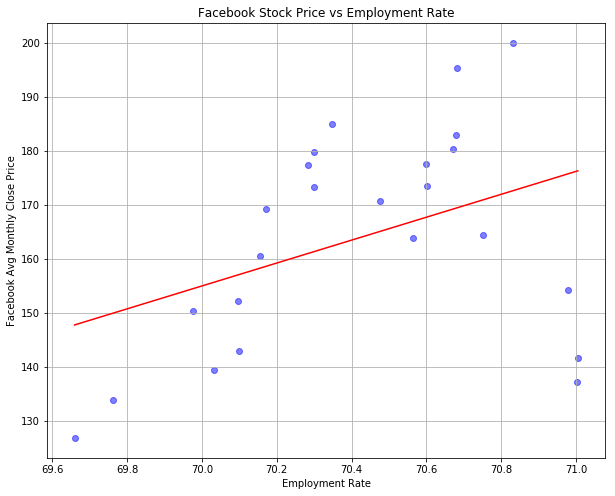

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(employment_and_interest["Employment Rate"], employment_and_interest["Close"], color='b', alpha=0.5)
plt.grid()
plt.xlabel('Employment Rate')
plt.ylabel('Facebook Avg Monthly Close Price')
plt.title('Facebook Stock Price vs Employment Rate')
plt.plot(np.unique(employment_and_interest["Employment Rate"]), np.poly1d(np.polyfit(employment_and_interest["Employment Rate"],employment_and_interest["Close"] , 1))(np.unique(employment_and_interest["Employment Rate"])), color = "red")
plt.show()

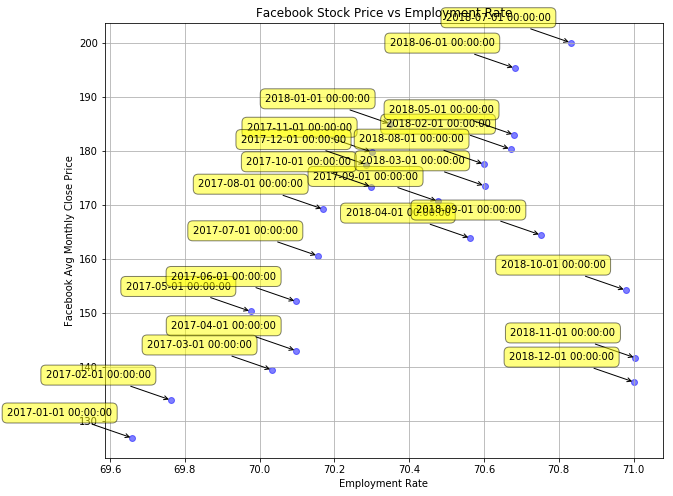

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(employment_and_interest["Employment Rate"], employment_and_interest["Close"], color='b', alpha=0.5)
plt.grid()
plt.xlabel('Employment Rate')
plt.ylabel('Facebook Avg Monthly Close Price')
plt.title('Facebook Stock Price vs Employment Rate')

for label, x, y in zip(employment_and_interest["Year Month"], employment_and_interest["Employment Rate"], employment_and_interest["Close"]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

In [24]:
trump="trump.csv"
trump_approval = pd.read_csv(trump)
trump_approval.head(20)

,survey_organization,party_affiliation,start_date,end_date,survey_method,survey_question,survey_population,survey_sample,approve_percent,disapprove_percent,undecided_percent,margin_of_error
0,Gallup,None,2017-01-20,2017-01-22,Live Phone,NaN,Adults,1500.0,45,45,NaN,3.0
1,Ipsos/Reuters,None,2017-01-20,2017-01-24,Internet,"Overall, do you approve or disapprove about th...",Adults,1633.0,43,45,13.0,2.8
2,Ipsos/Reuters,None,2017-01-20,2017-01-24,Internet,"Overall, do you approve or disapprove about th...",Adults (Democrats),680.0,15,75,10.0,4.3
3,Ipsos/Reuters,None,2017-01-20,2017-01-24,Internet,"Overall, do you approve or disapprove about th...",Adults (Republicans),557.0,85,11,4.0,4.7
4,Ipsos/Reuters,None,2017-01-20,2017-01-24,Internet,"Overall, do you approve or disapprove about th...",Adults (Independents),228.0,38,39,23.0,7.4
5,Politico/Morning Consult,None,2017-01-20,2017-01-22,Internet,NaN,Registered Voters,1992.0,46,37,17.0,2.0
6,Politico/Morning Consult,None,2017-01-20,2017-01-22,Internet,NaN,Registered Voters (Democrats),744.0,18,67,15.0,NaN
7,Politico/Morning Consult,None,2017-01-20,2017-01-22,Internet,NaN,Registered Voters (Republicans),642.0,83,8,9.0,NaN
8,Politico/Morning Consult,None,2017-01-20,2017-01-22,Internet,NaN,Registered Voters (Independents),606.0,41,31,28.0,NaN
9,Quinnipiac,None,2017-01-20,2017-01-25,Live Phone,Do you approve or disapprove of the way Donald...,Registered Voters,1190.0,36,44,19.0,2.8


In [25]:
trump_gallup=trump_approval.loc[trump_approval['survey_organization']=='Gallup']
trump_ratings=trump_gallup[["end_date","approve_percent"]]
trump_disapproval=trump_ratings.rename(columns={"end_date":"Date","approve_percent":"Approval Percentage" })
trump_disapproval.head()

,Date,Approval Percentage
0,2017-01-22,45
13,2017-01-23,45
14,2017-01-24,46
16,2017-01-25,46
26,2017-01-26,45


In [27]:
combined=pd.merge(trump_disapproval,stock_price,on='Date', how='inner')
combined.head()

,Date,Approval Percentage,Close
0,2017-01-23,45,128.929993
1,2017-01-24,46,129.369995
2,2017-01-25,46,131.479996
3,2017-01-26,45,132.779999
4,2017-01-27,42,132.179993


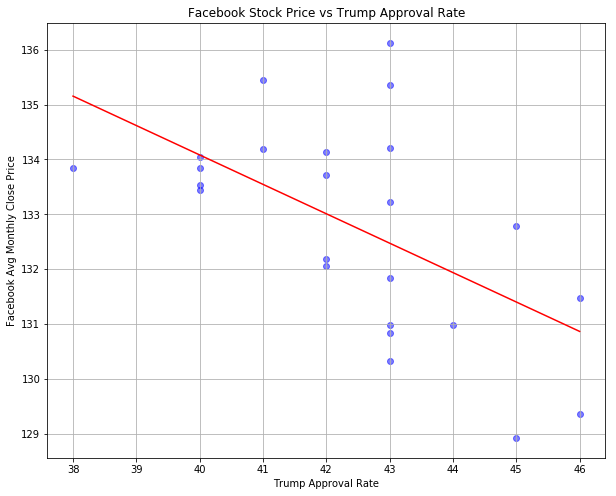

In [28]:
plt.figure(figsize=(10,8))
plt.scatter(combined["Approval Percentage"], combined["Close"], color='b', alpha=0.5)
plt.grid()
plt.xlabel('Trump Approval Rate')
plt.ylabel('Facebook Avg Monthly Close Price')
plt.title('Facebook Stock Price vs Trump Approval Rate')
plt.plot(np.unique(combined["Approval Percentage"]), np.poly1d(np.polyfit(combined["Approval Percentage"],combined["Close"] , 1))(np.unique(combined["Approval Percentage"])), color = "red")
plt.show()

In [29]:
get_ipython().run_line_magic('matplotlib', 'inline')

In [30]:
# Read the City and Ride Data
vix_data_df = pd.read_csv(vix_data_to_load)
fb_data_df = pd.read_csv(fb_data_to_load)
#fb_data_df
renamed_fb_df = fb_data_df.rename(columns={"Date": "Date", "Open": "FB Open", "High": "FB High", "Low": "FB Low", "Close": "FB Close",
                                          "Volume": "FB Volume"})
renamed_fb_df.head()

,Date,FB Open,FB High,FB Low,FB Close,Adj Close,FB Volume
0,2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900
1,2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900
2,2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200
3,2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300
4,2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22880400


In [31]:
#vix_data_df.tail()
combined_data_df = pd.merge(vix_data_df, renamed_fb_df, how='inner', on='Date')
combined_data_df.head()

,Date,VIX Open,VIX High,VIX Low,VIX Close,FB Open,FB High,FB Low,FB Close,Adj Close,FB Volume
0,2017-01-03,14.07,14.07,12.85,12.85,116.029999,117.839996,115.510002,116.860001,116.860001,20663900
1,2017-01-04,12.78,12.80,11.63,11.85,117.550003,119.660004,117.290001,118.690002,118.690002,19630900
2,2017-01-05,11.96,12.09,11.40,11.67,118.860001,120.949997,118.320000,120.669998,120.669998,19492200
3,2017-01-06,11.70,11.74,10.98,11.32,120.980003,123.879997,120.029999,123.410004,123.410004,28545300
4,2017-01-09,11.71,12.08,11.46,11.56,123.550003,125.430000,123.040001,124.900002,124.900002,22880400


In [32]:
# Obtain the x and y coordinates
vix_fb_df = combined_data_df[["Date", "VIX Close","FB Close"]]
vix_fb_df.head()

,Date,VIX Close,FB Close
0,2017-01-03,12.85,116.860001
1,2017-01-04,11.85,118.690002
2,2017-01-05,11.67,120.669998
3,2017-01-06,11.32,123.410004
4,2017-01-09,11.56,124.900002


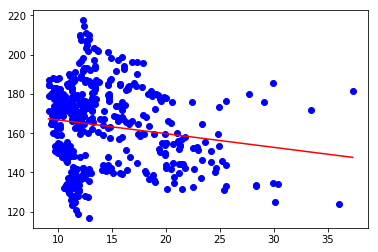

In [33]:
# Create a handle for each plot
plt.scatter(vix_fb_df["VIX Close"], vix_fb_df["FB Close"],color="blue", linewidth=1, label="VIX Close Price")
plt.plot(np.unique(vix_fb_df["VIX Close"]), np.poly1d(np.polyfit(vix_fb_df["VIX Close"], vix_fb_df["FB Close"], 1))(np.unique(vix_fb_df["VIX Close"])), color = "red")

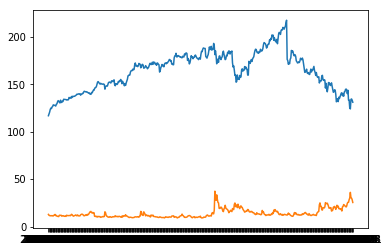

In [34]:
plt.plot(vix_fb_df["Date"], vix_fb_df["FB Close"])
plt.plot(vix_fb_df["Date"], vix_fb_df["VIX Close"])
plt.show()

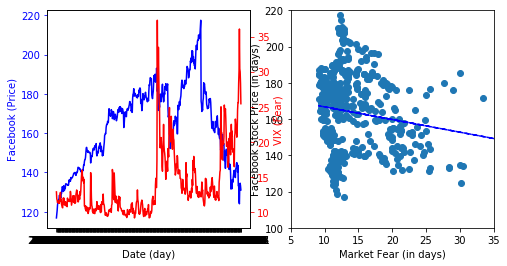

In [37]:
fig, ax1 = plt.subplots(1, 2, figsize=(8, 4))
ax1[0].plot(vix_fb_df["Date"], vix_fb_df["FB Close"], 'b-')
ax1[0].set_xlabel('Date (day)')

# Make the y-axis label, ticks and tick labels match the line color.
ax1[0].set_ylabel('Facebook (Price)', color='b')
ax1[0].tick_params('y', colors='b')

ax2 = ax1[0].twinx()
ax2.plot(vix_fb_df["Date"], vix_fb_df["VIX Close"], 'r-')

ax2.set_ylabel('VIX (Fear)', color='r')
ax2.tick_params('y', colors='r')
(slope, intercept, _, _, _) = linregress(vix_fb_df["VIX Close"], vix_fb_df["FB Close"])
fit = slope * vix_fb_df["VIX Close"] + intercept

ax1[1].set_xlim(5, 35)
ax1[1].set_ylim(100, 220)

ax1[1].set_xlabel("Market Fear (in days)")
ax1[1].set_ylabel("Facebook Stock Price (in days)")

ax1[1].plot(vix_fb_df["VIX Close"], vix_fb_df["FB Close"], linewidth=0, marker='o')
ax1[1].plot(vix_fb_df["VIX Close"], fit, 'b--')

plt.subplots_adjust(hspace=-5)

# Save Figure
plt.savefig("combine_line-scatter_plot.png", bbox_inches="tight")

# plt.show()
plt.show()

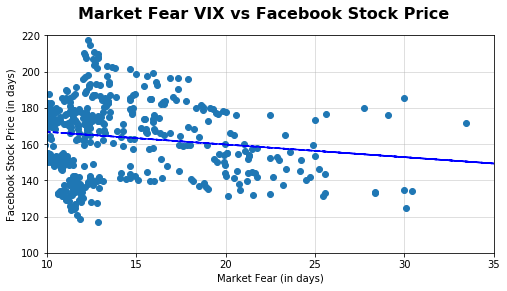

In [38]:
(slope, intercept, _, _, _) = linregress(vix_fb_df["VIX Close"], vix_fb_df["FB Close"])
fit = slope * vix_fb_df["VIX Close"] + intercept

fig, ax = plt.subplots(figsize=(8, 4))

fig.suptitle("Market Fear VIX vs Facebook Stock Price", fontsize=16, fontweight="bold")

ax.set_xlim(10, 35)
ax.set_ylim(100, 220)
plt.grid(axis='both', alpha=0.5)

ax.set_xlabel("Market Fear (in days)")
ax.set_ylabel("Facebook Stock Price (in days)")

ax.plot(vix_fb_df["VIX Close"], vix_fb_df["FB Close"], linewidth=0, marker='o')
ax.plot(vix_fb_df["VIX Close"], fit, 'b--')

# Save Figure
plt.savefig("linreg_scatter_plot.png", bbox_inches="tight")

plt.show()

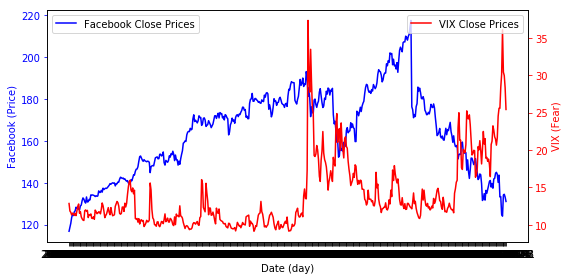

In [40]:
fig, ax1 = plt.subplots(figsize=(8, 4))
fb_handle, = ax1.plot(vix_fb_df["Date"], vix_fb_df["FB Close"], 'b-')
ax1.set_xlabel('Date (day)')
plt.legend(loc="upper left")

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Facebook (Price)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
vix_handle, = ax2.plot(vix_fb_df["Date"], vix_fb_df["VIX Close"], 'r-')

ax2.set_ylabel('VIX (Fear)', color='r')
ax2.tick_params('y', colors='r')

ax1.legend(['Facebook Close Prices'], loc='upper left')
ax2.legend(['VIX Close Prices'], loc='upper right')

fig.tight_layout()
# Save Figure
plt.savefig("dualaxes_line_plot.png", bbox_inches="tight")

In [41]:
#The effective federal funds rate is the interest rate banks charge each other for overnight loans to meet their reserve requirements. 
#Also known as the federal funds rate, the effective federal funds rate is set by the Federal Open Market Committee, or FOMC. 
#The effective federal funds rate is the most influential interest rate in the nation’s economy. It affects employment, growth and inflation.
effr = pd.read_csv(int_rate_path)
effr["YYYY-MM"] = [x[:7] for x in effr["Date"]]
effr_grouped = effr.groupby("YYYY-MM").min()
effr_grouped.head()

,Date,Federal Funds Rate
YYYY-MM,,
2016-01,2016-01-01,0.34
2016-02,2016-02-01,0.38
2016-03,2016-03-01,0.36
2016-04,2016-04-01,0.37
2016-05,2016-05-01,0.37


In [42]:
#Get the average stock price per month
stock["YYYY-MM"] = [x[:7] for x in stock["Date"]]
stock_grouped = stock.groupby("YYYY-MM")
stock_monthly = pd.DataFrame(stock_grouped["Close"].mean())
# stock_monthly["Year Month"] = pd.to_datetime(stock_monthly.index)
stock_monthly.head()

,Close
YYYY-MM,
2017-01,126.817499
2017-02,133.830525
2017-03,139.408261
2017-04,142.965263
2017-05,150.234093


In [46]:
merge_table = pd.merge(stock_monthly, effr_grouped, left_index = True, right_index = True, how="inner")
merge_table.head()

,Close,Date,Federal Funds Rate
YYYY-MM,,,
2017-01,126.817499,2017-01-01,0.65
2017-02,133.830525,2017-02-01,0.66
2017-03,139.408261,2017-03-01,0.79
2017-04,142.965263,2017-04-01,0.90
2017-05,150.234093,2017-05-01,0.91


In [47]:
# Obtain coordinates to plot graph
stock = merge_table[["Date", "Close","Federal Funds Rate"]]
stock.head()

,Date,Close,Federal Funds Rate
YYYY-MM,,,
2017-01,2017-01-01,126.817499,0.65
2017-02,2017-02-01,133.830525,0.66
2017-03,2017-03-01,139.408261,0.79
2017-04,2017-04-01,142.965263,0.90
2017-05,2017-05-01,150.234093,0.91


In [48]:
x = stock["Federal Funds Rate"]
y = stock ["Close"]
plt.scatter(x, y, linewidth=1, marker="o", facecolors="blue", edgecolors="black", s=x_axis, alpha=0.75)
plt.title('Note : Affect of Interest Rate on Facebook Stock Price')
plt.xlabel('Effective Federal Funds Rate(Interest Rate)')
plt.ylabel('Facebook Stock Price(Closing)')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = "red")

NameError: name 'x_axis' is not defined

In [49]:
x_3 = stock.iloc[:-3,2]
y_3 = stock.iloc[:-3,1]
plt.scatter(x_3, y_3, linewidth=1, marker="o", facecolors="blue", edgecolors="black", s=x_axis, alpha=0.75)
plt.title('Note : Affect of Interest Rate on Facebook Stock Price')
plt.xlabel('Effective Federal Funds Rate(Interest Rate)')
plt.ylabel('Facebook Stock Price(Closing)')
plt.plot(np.unique(x_3), np.poly1d(np.polyfit(x_3, y_3, 1))(np.unique(x_3)), color = "red")

NameError: name 'x_axis' is not defined